#STEP -1
##Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Sampling the Large Dataset

In [2]:
df = pd.read_csv("Hospital_Inpatient_Discharges__SPARCS_De-Identified___2012_20240601.csv")
df_sample = df.head(50000)
df_sample.to_csv('new_dataset.csv',index=False)
df_sample

C:\Users\karth\AppData\Local\Temp\ipykernel_9508\3893176754.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Hospital_Inpatient_Discharges__SPARCS_De-Identified___2012_20240601.csv")


,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,30 to 49,147,F,White,Not Span/Hispanic,...,Minor,Medical,Blue Cross/Blue Shield,NaN,NaN,0,N,Y,5511.95,5582.49
1,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Major,Medical,Medicare,NaN,NaN,0,N,Y,4783.20,5162.82
2,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,30 to 49,147,F,White,Not Span/Hispanic,...,Minor,Medical,Blue Cross/Blue Shield,NaN,NaN,0,N,Y,3829.15,4056.52
3,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,0 to 17,147,F,White,Not Span/Hispanic,...,Minor,Medical,Private Health Insurance,NaN,NaN,0,N,Y,1108.20,1644.75
4,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,NaN,NaN,0,N,Y,3418.18,3370.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Western NY,Erie,1401014.0,208.0,Women And Children's Hospital Of Buffalo,18 to 29,142,M,White,Not Span/Hispanic,...,Moderate,Medical,Private Health Insurance,Medicare,Medicaid,0,N,Y,32333.72,18771.23
49996,Western NY,Erie,1401014.0,208.0,Women And Children's Hospital Of Buffalo,0 to 17,141,M,White,Not Span/Hispanic,...,Minor,Medical,Medicaid,Self-Pay,NaN,0,N,Y,4992.69,2485.44
49997,Western NY,Erie,1401014.0,208.0,Women And Children's Hospital Of Buffalo,0 to 17,142,M,White,Not Span/Hispanic,...,Minor,Medical,Blue Cross/Blue Shield,Self-Pay,NaN,0,N,Y,21670.10,8180.45
49998,Western NY,Erie,1401014.0,208.0,Women And Children's Hospital Of Buffalo,0 to 17,140,F,White,Not Span/Hispanic,...,Minor,Medical,Private Health Insurance,Self-Pay,NaN,0,N,Y,6112.14,2875.66


##Providing the main statistics about the Large dataset (e.g. number of entries, features)

In [3]:
num_entries = df_sample.shape[0]
num_features = df_sample.shape[1]
print(f"Number of entries: {num_entries}")
print(f"Number of features: {num_features}")

summary_statistics = df_sample.describe()
print("Summary statistics:")
print(summary_statistics)

Number of entries: 50000
Number of features: 34
Summary statistics:
       Operating Certificate Number   Facility ID  Discharge Year  \
count                  4.986300e+04  49863.000000         50000.0   
mean                   1.025091e+06    157.172352          2012.0   
std                    4.546474e+05     61.359461             0.0   
min                    2.267000e+05     37.000000          2012.0   
25%                    6.010000e+05    103.000000          2012.0   
50%                    1.401014e+06    207.000000          2012.0   
75%                    1.401014e+06    207.000000          2012.0   
max                    1.401014e+06    210.000000          2012.0   

       CCS Diagnosis Code  CCS Procedure Code  APR DRG Code  APR MDC Code  \
count        50000.000000        50000.000000   50000.00000  50000.000000   
mean           198.093220           81.992740     382.66220      9.584620   
std            165.972306           80.951482     243.81315      5.973213   
mi

Dropping the uncorrelated features which are not required for the implementation

In [4]:
df_clean = df_sample.drop(['Health Service Area', 'Hospital County', 'Operating Certificate Number', 'Facility ID', 'Zip Code - 3 digits', 'Race', 'Ethnicity', 'Discharge Year',
               'Payment Typology 1', 'CCS Diagnosis Description', 'APR DRG Description', 'APR MDC Description', 'Payment Typology 2', 'Payment Typology 3', 'APR Severity of Illness Description', 'CCS Procedure Description', 'Birth Weight', 'Abortion Edit Indicator'], axis=1)
df_clean


,Facility Name,Age Group,Gender,Length of Stay,Type of Admission,Patient Disposition,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,APR Medical Surgical Description,Emergency Department Indicator,Total Charges,Total Costs
0,Cuba Memorial Hospital Inc,30 to 49,F,4,Elective,Home or Self Care,122,0,139,4,1,Minor,Medical,Y,5511.95,5582.49
1,Cuba Memorial Hospital Inc,70 or Older,F,4,Urgent,Short-term Hospital,197,0,383,9,3,Major,Medical,Y,4783.20,5162.82
2,Cuba Memorial Hospital Inc,30 to 49,F,3,Urgent,Home or Self Care,122,0,139,4,1,Minor,Medical,Y,3829.15,4056.52
3,Cuba Memorial Hospital Inc,0 to 17,F,1,Urgent,Home or Self Care,122,0,139,4,1,Minor,Medical,Y,1108.20,1644.75
4,Cuba Memorial Hospital Inc,70 or Older,F,3,Elective,Home or Self Care,122,0,139,4,2,Moderate,Medical,Y,3418.18,3370.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Women And Children's Hospital Of Buffalo,18 to 29,M,7,Emergency,Home or Self Care,56,54,131,4,3,Moderate,Medical,Y,32333.72,18771.23
49996,Women And Children's Hospital Of Buffalo,0 to 17,M,1,Emergency,Home or Self Care,126,0,113,3,2,Minor,Medical,Y,4992.69,2485.44
49997,Women And Children's Hospital Of Buffalo,0 to 17,M,3,Emergency,Home or Self Care,259,4,861,23,2,Minor,Medical,Y,21670.10,8180.45
49998,Women And Children's Hospital Of Buffalo,0 to 17,F,1,Emergency,Home or Self Care,50,0,420,10,2,Minor,Medical,Y,6112.14,2875.66


##Handle missing entries

In [5]:
df_clean.isnull().sum()
df_clean = df_clean.dropna(subset=['APR Risk of Mortality'])

##Providing the main statistics about the Sample dataset (e.g. number of entries, features)

In [6]:
num_entries = df_clean.shape[0]
num_features = df_clean.shape[1]
print(f"Number of entries: {num_entries}")
print(f"Number of features: {num_features}")

summary_statistics = df_clean.describe()
print("Summary statistics:")
print(summary_statistics)

Number of entries: 49999
Number of features: 16
Summary statistics:
       CCS Diagnosis Code  CCS Procedure Code  APR DRG Code  APR MDC Code  \
count        49999.000000        49999.000000  49999.000000  49999.000000   
mean           198.092822           81.992080    382.650753      9.584512   
std            165.973942           80.952157    243.802152      5.973224   
min              1.000000            0.000000      1.000000      1.000000   
25%            106.000000            0.000000    190.000000      5.000000   
50%            153.000000           58.000000    302.000000      8.000000   
75%            218.000000          152.000000    633.000000     15.000000   
max            670.000000          231.000000    952.000000     25.000000   

       APR Severity of Illness Code  Total Charges   Total Costs  
count                  49999.000000   4.999900e+04  4.999900e+04  
mean                       2.156763   2.411350e+04  1.140890e+04  
std                        0.922789  

##To check mismatched string formats
(Checking the Value Counts of each column: There are no such mismatched string formats)

In [7]:
columns = [
    'Age Group', 'Gender', 'Type of Admission', 'Facility Name',
    'CCS Diagnosis Code', 'CCS Procedure Code', 'Patient Disposition', 'APR Severity of Illness Code',  'Length of Stay', 'APR Medical Surgical Description', 'APR DRG Code', 'APR MDC Code',
    'Emergency Department Indicator', 'APR Risk of Mortality','Total Charges', 'Total Costs'
]

for column in columns:
    print(f"Value counts for {column}:")
    print(df_clean[column].value_counts())
    print("\n")

Value counts for Age Group:
70 or Older    14449
50 to 69       14422
30 to 49        8356
0 to 17         7379
18 to 29        5393
Name: Age Group, dtype: int64


Value counts for Gender:
F    28079
M    21916
U        4
Name: Gender, dtype: int64


Value counts for Type of Admission:
Emergency        23715
Elective         12259
Urgent           10529
Newborn           3487
Not Available        9
Name: Type of Admission, dtype: int64


Value counts for Facility Name:
Buffalo General Medical Center                                            23150
Woman's Christian Association                                              6406
Women And Children's Hospital Of Buffalo                                   6049
Olean General Hospital                                                     5792
Brooks Memorial Hospital                                                   3128
Memorial Hosp of Wm F & Gertrude F Jones A/K/A Jones Memorial Hosp         1937
TLC Health Network Lake Shore Hospital       

##Checking for outliers

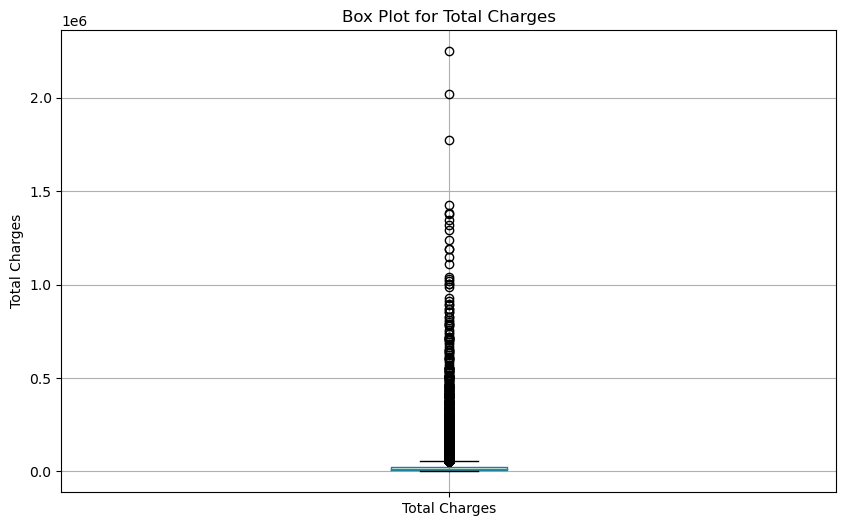

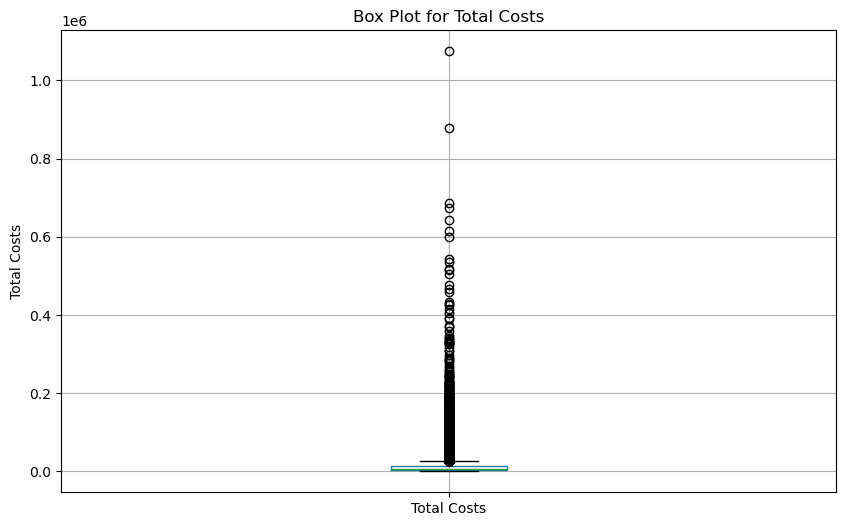

In [8]:
columns_box = ['Total Charges', 'Total Costs']

for column in columns_box:
    plt.figure(figsize=(10, 6))
    df_clean.boxplot(column=column)
    plt.title(f'Box Plot for {column}')
    plt.ylabel(column)
    plt.show()

##Handling the outliers by using z-score

In [9]:
from scipy.stats import zscore

columns_with_outliers = ['Total Charges', 'Total Costs']

threshold = 3
df_cleaned = df_clean.copy()
for column in columns_with_outliers:
    z_scores = zscore(df_cleaned[column])
    df_cleaned = df_cleaned[(z_scores < threshold) & (z_scores > -threshold)]
print("Using Z-Score :")
print(f"Original DataFrame shape: {df_clean.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

Using Z-Score :
Original DataFrame shape: (49999, 16)
Cleaned DataFrame shape: (48241, 16)


###Converting the Age Group into Numerical Values

In [10]:
age_mapping = {
    '0 to 17': 0,
    '18 to 29': 1,
    '30 to 49': 2,
    '50 to 69': 3,
    '70 or Older': 4
}

df_cleaned.loc[:, 'Age Group'] = df_cleaned['Age Group'].map(age_mapping)

df_cleaned


C:\Users\karth\AppData\Local\Temp\ipykernel_9508\304851818.py:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_cleaned.loc[:, 'Age Group'] = df_cleaned['Age Group'].map(age_mapping)


,Facility Name,Age Group,Gender,Length of Stay,Type of Admission,Patient Disposition,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,APR Medical Surgical Description,Emergency Department Indicator,Total Charges,Total Costs
0,Cuba Memorial Hospital Inc,2,F,4,Elective,Home or Self Care,122,0,139,4,1,Minor,Medical,Y,5511.95,5582.49
1,Cuba Memorial Hospital Inc,4,F,4,Urgent,Short-term Hospital,197,0,383,9,3,Major,Medical,Y,4783.20,5162.82
2,Cuba Memorial Hospital Inc,2,F,3,Urgent,Home or Self Care,122,0,139,4,1,Minor,Medical,Y,3829.15,4056.52
3,Cuba Memorial Hospital Inc,0,F,1,Urgent,Home or Self Care,122,0,139,4,1,Minor,Medical,Y,1108.20,1644.75
4,Cuba Memorial Hospital Inc,4,F,3,Elective,Home or Self Care,122,0,139,4,2,Moderate,Medical,Y,3418.18,3370.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Women And Children's Hospital Of Buffalo,1,M,7,Emergency,Home or Self Care,56,54,131,4,3,Moderate,Medical,Y,32333.72,18771.23
49996,Women And Children's Hospital Of Buffalo,0,M,1,Emergency,Home or Self Care,126,0,113,3,2,Minor,Medical,Y,4992.69,2485.44
49997,Women And Children's Hospital Of Buffalo,0,M,3,Emergency,Home or Self Care,259,4,861,23,2,Minor,Medical,Y,21670.10,8180.45
49998,Women And Children's Hospital Of Buffalo,0,F,1,Emergency,Home or Self Care,50,0,420,10,2,Minor,Medical,Y,6112.14,2875.66


 ## Data visualization (providing 5 visualization graphs includes Correlation Matrix)

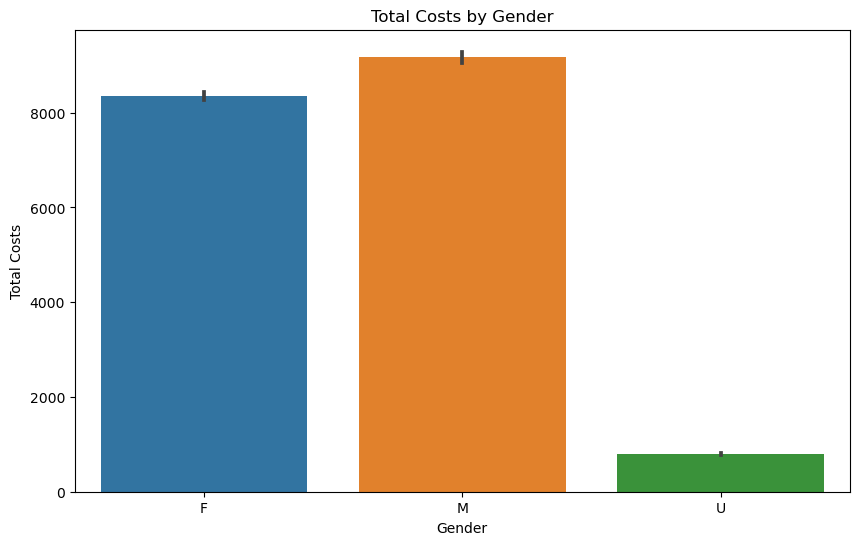

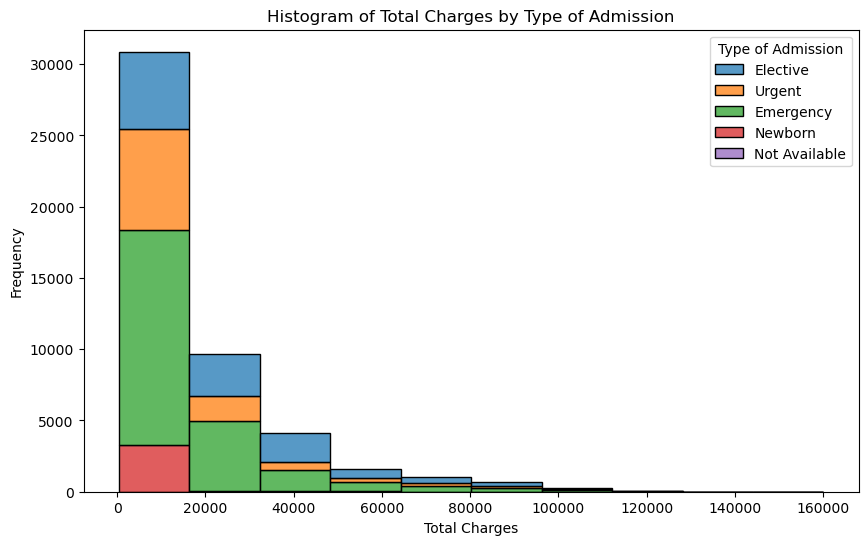

C:\Users\karth\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


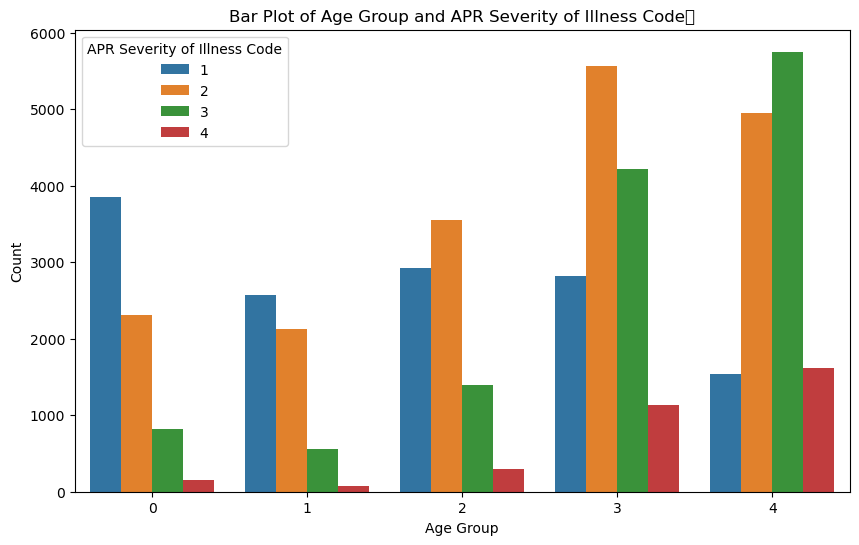

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_cleaned, x='Gender', y='Total Costs')
plt.title('Total Costs by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Costs')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='Total Charges', hue='Type of Admission', multiple='stack', bins=10)
plt.title('Histogram of Total Charges by Type of Admission')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='Age Group', hue='APR Severity of Illness Code')
plt.title('Bar Plot of Age Group and APR Severity of Illness Code	')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='APR Severity of Illness Code')
plt.show()

C:\Users\karth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


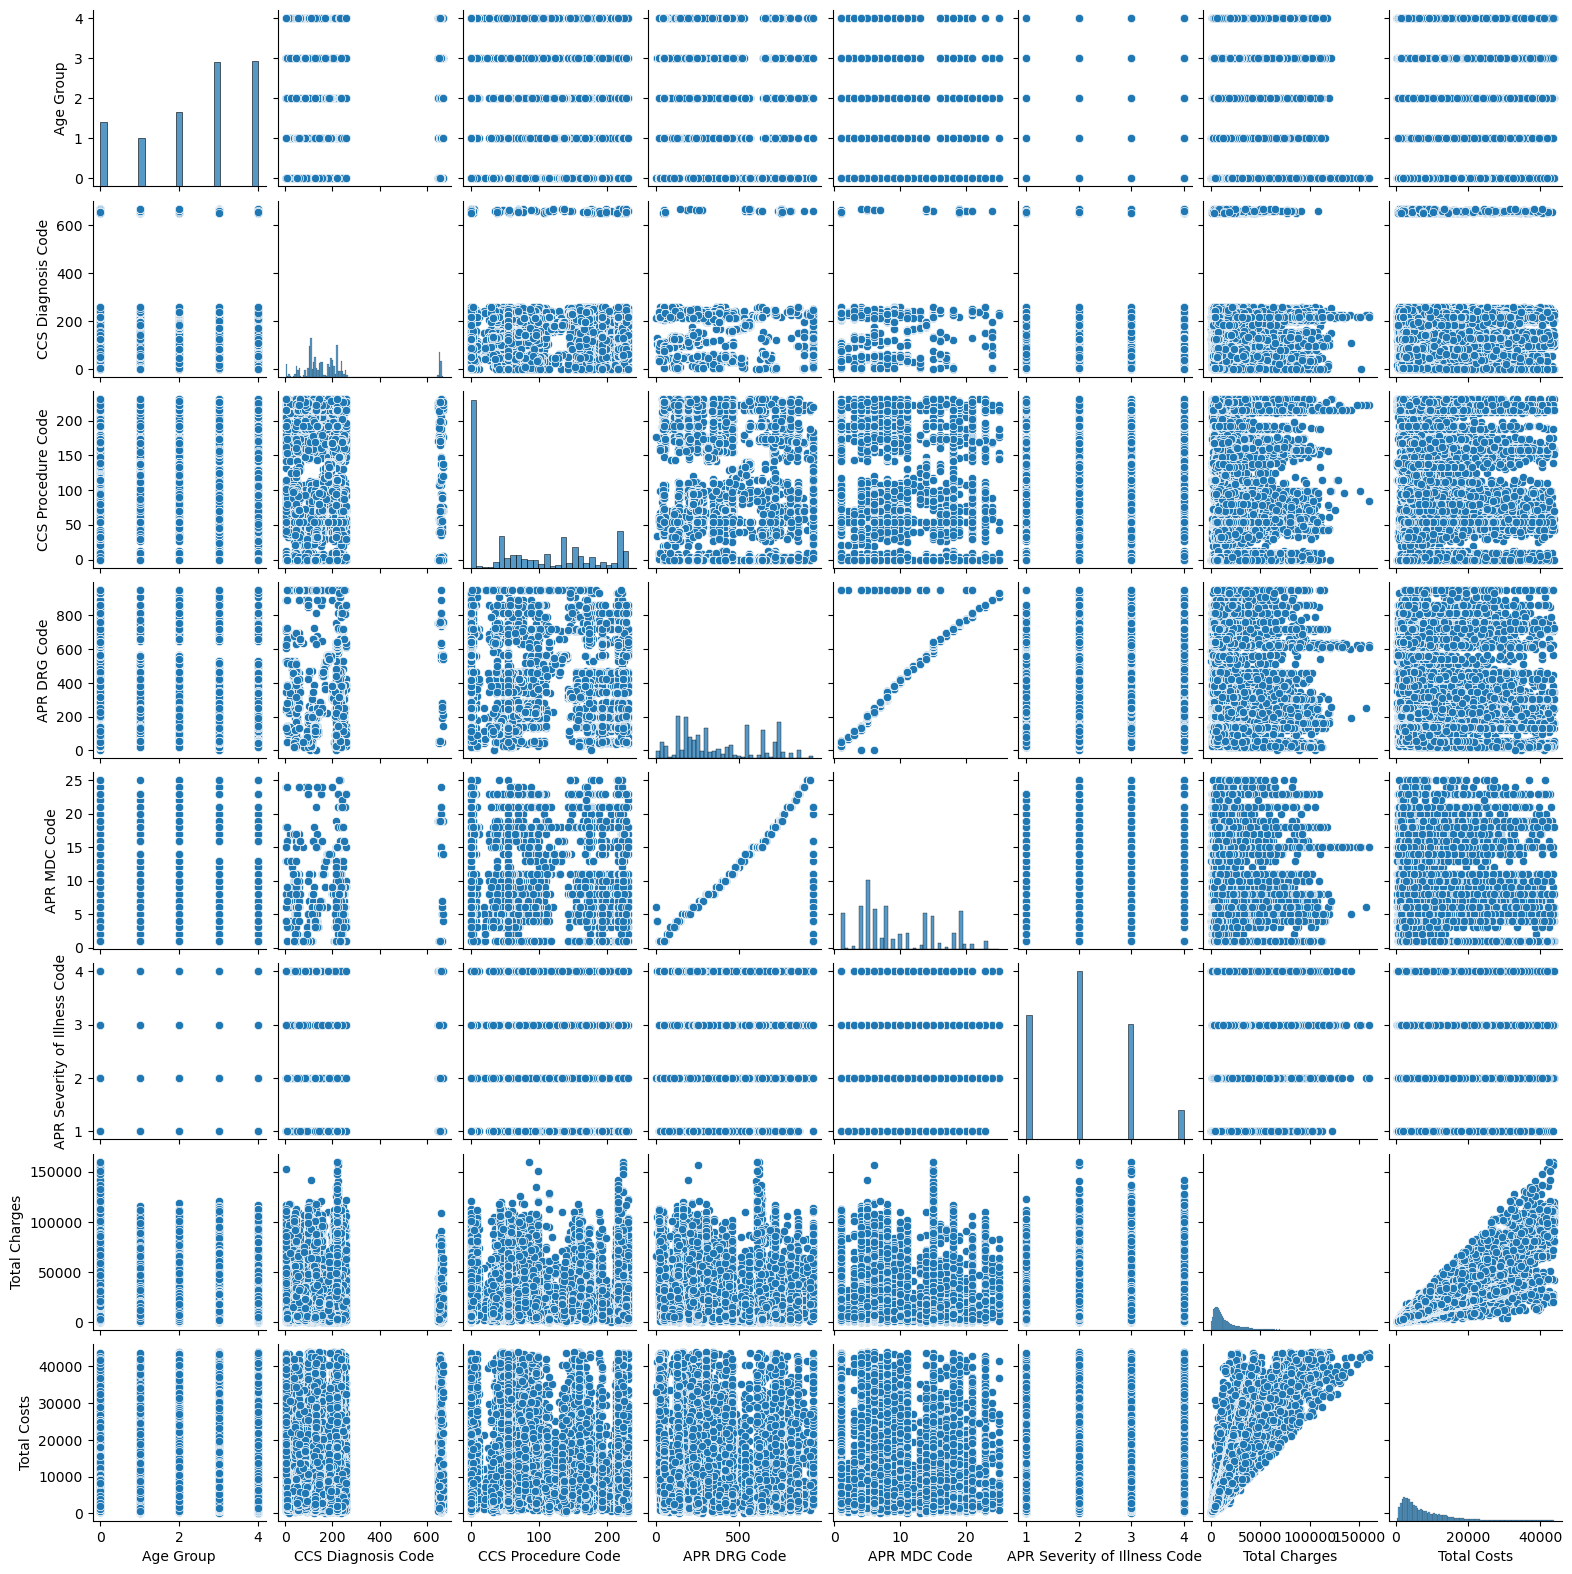

In [12]:
sns.pairplot(df_cleaned, height=2)
plt.show()

## Correaltion Matrix

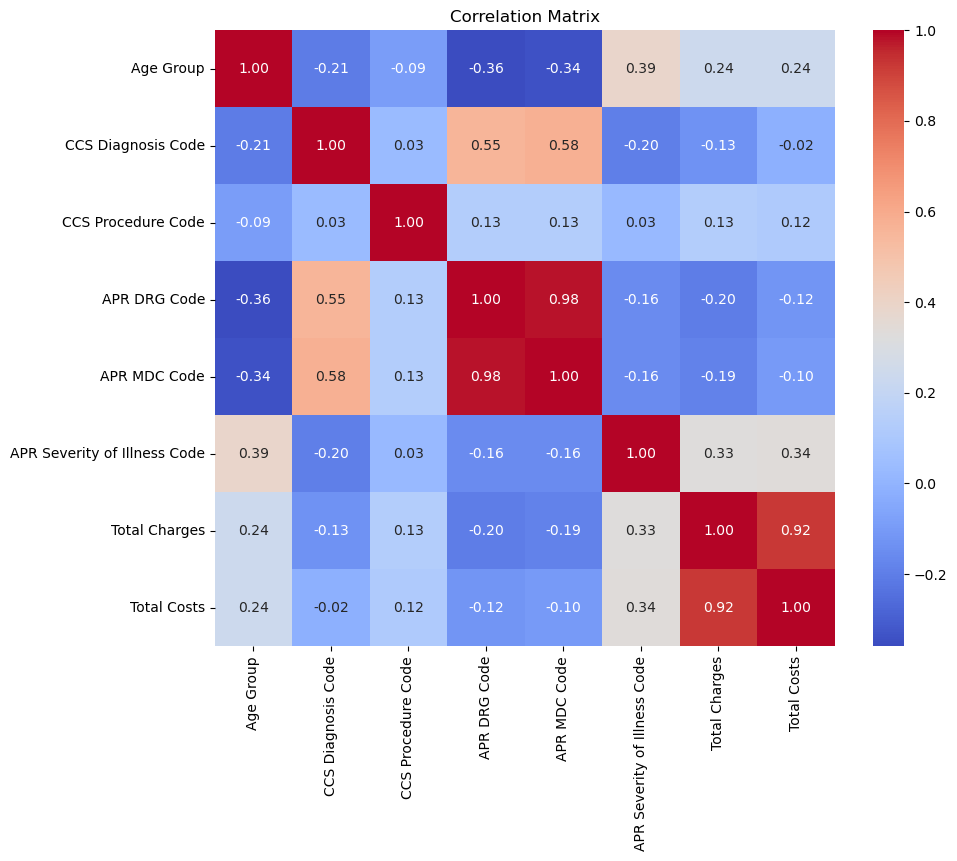

In [13]:
num_columns = df_cleaned.select_dtypes(include=['int64', 'float64'])
correlation_matrix = num_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Converting features using One hot Encoding

In [14]:
df_encoded = pd.get_dummies(df_cleaned, dtype=int)
df_encoded

,Age Group,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Total Charges,Total Costs,Facility Name_Brooks Memorial Hospital,Facility Name_Buffalo General Medical Center,...,Patient Disposition_Short-term Hospital,Patient Disposition_Skilled Nursing Home,APR Risk of Mortality_Extreme,APR Risk of Mortality_Major,APR Risk of Mortality_Minor,APR Risk of Mortality_Moderate,APR Medical Surgical Description_Medical,APR Medical Surgical Description_Surgical,Emergency Department Indicator_N,Emergency Department Indicator_Y
0,2,122,0,139,4,1,5511.95,5582.49,0,0,...,0,0,0,0,1,0,1,0,0,1
1,4,197,0,383,9,3,4783.20,5162.82,0,0,...,1,0,0,1,0,0,1,0,0,1
2,2,122,0,139,4,1,3829.15,4056.52,0,0,...,0,0,0,0,1,0,1,0,0,1
3,0,122,0,139,4,1,1108.20,1644.75,0,0,...,0,0,0,0,1,0,1,0,0,1
4,4,122,0,139,4,2,3418.18,3370.87,0,0,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,56,54,131,4,3,32333.72,18771.23,0,0,...,0,0,0,0,0,1,1,0,0,1
49996,0,126,0,113,3,2,4992.69,2485.44,0,0,...,0,0,0,0,1,0,1,0,0,1
49997,0,259,4,861,23,2,21670.10,8180.45,0,0,...,0,0,0,0,1,0,1,0,0,1
49998,0,50,0,420,10,2,6112.14,2875.66,0,0,...,0,0,0,0,1,0,1,0,0,1


## Splitting the dataset into training, testing and validation sets.

In [15]:
from sklearn.model_selection import train_test_split

train_val, test = train_test_split(df_encoded, test_size=0.15, random_state=42)
train, val = train_test_split(train_val, test_size=0.15, random_state=42)

# Print the sizes of each split
print(f"Train set size: {len(train)}")
print(f"Validation set size: {len(val)}")
print(f"Test set size: {len(test)}")

Train set size: 34853
Validation set size: 6151
Test set size: 7237


## Print the shape of your X_train, y_train, X_test, y_test, X_validation ,y_validation

In [16]:
X_train = train.drop(['Total Costs', 'Total Charges'], axis=1)
y_train = train['Total Costs']
X_val = val.drop(['Total Costs', 'Total Charges'], axis=1)
y_val = val['Total Costs']
X_test = test.drop(['Total Costs', 'Total Charges'], axis=1)
y_test = test['Total Costs']

# Print the shapes of the data splits
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (34853, 109)
y_train shape: (34853,)
X_val shape: (6151, 109)
y_val shape: (6151,)
X_test shape: (7237, 109)
y_test shape: (7237,)


#STEP - 2

##Applying ML Models
1. Linear Regression
2. Gradient Boosting
3. Random Forest Regression

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

1. Linear Regression

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_linear = lr.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression:")
print("  MSE:", mse_linear)
print("  RMSE:", rmse_linear)
print("  R²:", r2_linear)

Linear Regression:
  MSE: 20119612.665589537
  RMSE: 4485.489122223968
  R²: 0.7014185665094335


2. Gradient Boost

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f'Training MSE: {mse_train}, R^2: {r2_train}')
print(f'Testing MSE: {mse_test}, R^2: {r2_test}')

Training MSE: 18380520.424783252, R^2: 0.7203066299817873
Testing MSE: 18911959.143272307, R^2: 0.7193405278238336


3. Random Forest Regressor

In [20]:
# Initialize and train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor:")
print("  MSE:", mse_rf)
print("  RMSE:", rmse_rf)
print("  R²:", r2_rf)


Random Forest Regressor:
  MSE: 11929246.657617468
  RMSE: 3453.8741519657992
  R²: 0.8229661958857792


##Comparison of the results of different ML models using Graphs

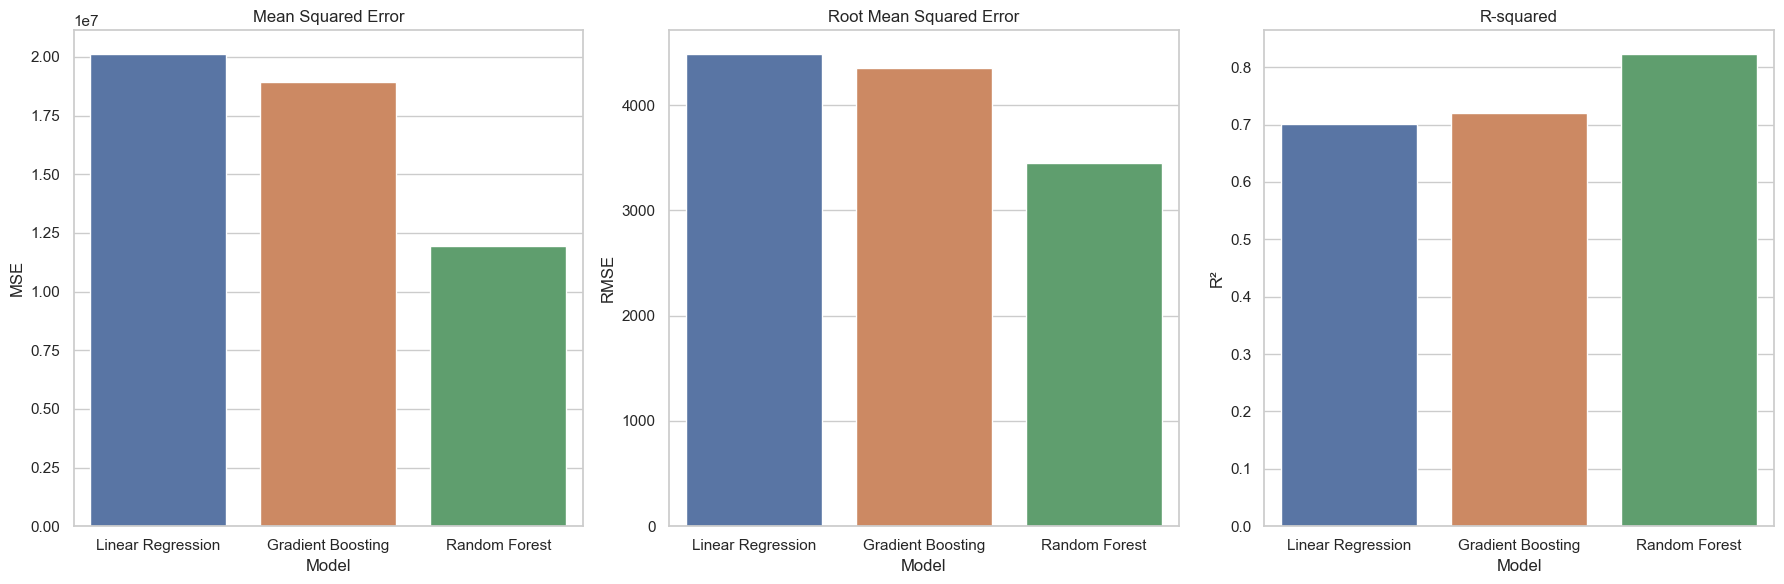

In [21]:
metrics_data = {
    'Model': ['Linear Regression', 'Gradient Boosting', 'Random Forest'],
    'MSE': [mse_linear, mse_test, mse_rf],
    'RMSE': [rmse_linear, np.sqrt(mse_test), rmse_rf],
    'R²': [r2_linear, r2_test, r2_rf]
}

metrics_df = pd.DataFrame(metrics_data)

# Set the plot style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot MSE
sns.barplot(x='Model', y='MSE', data=metrics_df, ax=axes[0])
axes[0].set_title('Mean Squared Error')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('MSE')

# Plot RMSE
sns.barplot(x='Model', y='RMSE', data=metrics_df, ax=axes[1])
axes[1].set_title('Root Mean Squared Error')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('RMSE')

# Plot R²
sns.barplot(x='Model', y='R²', data=metrics_df, ax=axes[2])
axes[2].set_title('R-squared')
axes[2].set_xlabel('Model')
axes[2].set_ylabel('R²')

# Adjust layout
plt.tight_layout()
plt.show()


#STEP -3
##Building a NN

###Importing Required Libraries

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset, random_split

In [26]:
# Scaling and Converting to PyTorch tensors
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.to_numpy(), dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32).view(-1, 1)

batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Defining the NN

In [27]:
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Training the data

In [31]:
model = RegressionModel(input_dim=X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20
train_losses = []
val_losses = []
val_mae = []
train_r2 = []
val_r2 = []

for epoch in range(num_epochs):
    model.train()
    epoch_train_loss = 0.0
    train_preds = []
    train_targets = []
    
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item() * X_batch.size(0)
        train_preds.extend(outputs.detach().numpy())
        train_targets.extend(y_batch.numpy())

    epoch_train_loss /= len(train_loader.dataset)
    train_losses.append(epoch_train_loss)
    train_r2_score = r2_score(train_targets, train_preds)
    train_r2.append(train_r2_score)

    model.eval()
    epoch_val_loss = 0.0
    val_preds = []
    val_targets = []
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            epoch_val_loss += loss.item() * X_batch.size(0)
            val_preds.extend(outputs.numpy())
            val_targets.extend(y_batch.numpy())

    epoch_val_loss /= len(val_loader.dataset)
    val_losses.append(epoch_val_loss)
    val_mae.append(mean_absolute_error(val_targets, val_preds))
    val_r2_score = r2_score(val_targets, val_preds)
    val_r2.append(val_r2_score)
    
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_train_loss:.4f}, Train R²: {train_r2_score:.4f}, Val Loss: {epoch_val_loss:.4f}, Val R²: {val_r2_score:.4f}, Val MAE: {val_mae[-1]:.4f}")

model.eval()
with torch.no_grad():
    test_preds = model(X_test_tensor).numpy()
    test_targets = y_test_tensor.numpy()
    test_mae = mean_absolute_error(test_targets, test_preds)
    test_r2 = r2_score(test_targets, test_preds)

print(f"Test MAE: {test_mae:.4f}")
print(f"Test R²: {test_r2:.4f}")

Epoch 1/20, Train Loss: 83337858.8209, Train R²: -0.2681, Val Loss: 35992893.8631, Val R²: 0.4516, Val MAE: 3934.6968
Epoch 2/20, Train Loss: 27776436.5792, Train R²: 0.5773, Val Loss: 23007503.9459, Val R²: 0.6494, Val MAE: 2891.0732
Epoch 3/20, Train Loss: 21840527.2625, Train R²: 0.6677, Val Loss: 20439980.0541, Val R²: 0.6885, Val MAE: 2648.9253
Epoch 4/20, Train Loss: 20151664.7757, Train R²: 0.6934, Val Loss: 19371251.9719, Val R²: 0.7048, Val MAE: 2576.1775
Epoch 5/20, Train Loss: 19334236.5678, Train R²: 0.7058, Val Loss: 18794418.4986, Val R²: 0.7136, Val MAE: 2523.4824
Epoch 6/20, Train Loss: 18813334.7990, Train R²: 0.7137, Val Loss: 18422106.4587, Val R²: 0.7193, Val MAE: 2505.1860
Epoch 7/20, Train Loss: 18431728.1350, Train R²: 0.7195, Val Loss: 18133670.7637, Val R²: 0.7237, Val MAE: 2452.6223
Epoch 8/20, Train Loss: 18143482.6860, Train R²: 0.7239, Val Loss: 17932590.9258, Val R²: 0.7267, Val MAE: 2412.6497
Epoch 9/20, Train Loss: 17900583.3191, Train R²: 0.7276, Val Lo

# Visualization

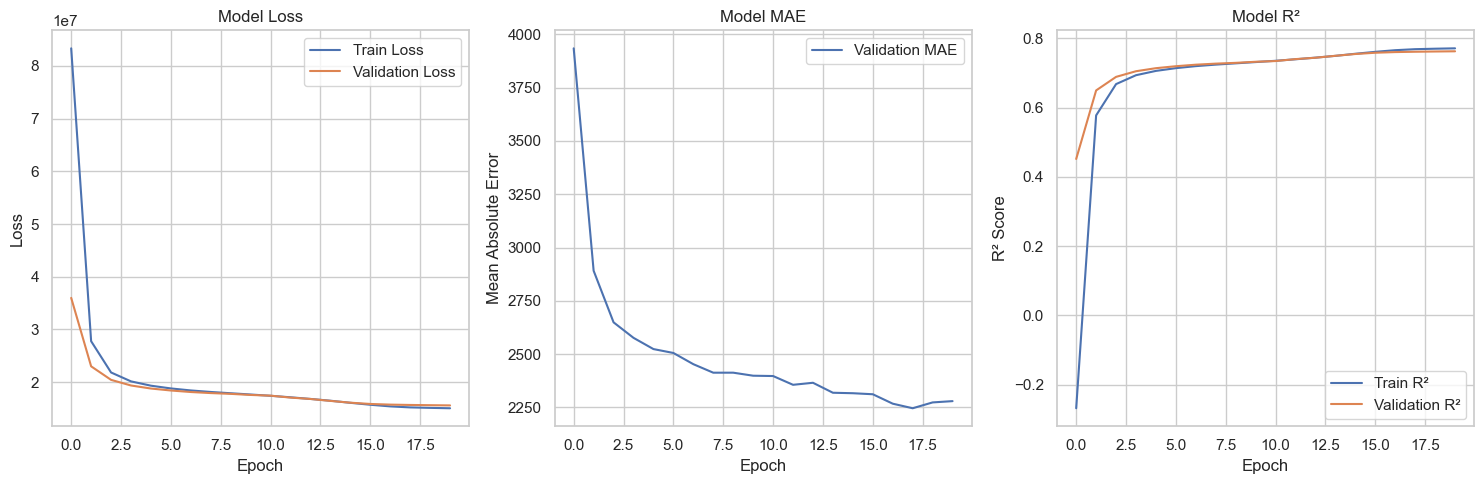

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(train_losses, label='Train Loss')
axes[0].plot(val_losses, label='Validation Loss')
axes[0].set_title('Model Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

axes[1].plot(val_mae, label='Validation MAE')
axes[1].set_title('Model MAE')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Mean Absolute Error')
axes[1].legend()

axes[2].plot(train_r2, label='Train R²')
axes[2].plot(val_r2, label='Validation R²')
axes[2].set_title('Model R²')
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('R² Score')
axes[2].legend()

plt.tight_layout()
plt.show()

##Save the model

In [37]:
model_path = "pytorch_regression_model.pth"
torch.save(model.state_dict(), model_path)

loaded_model = RegressionModel(input_dim=X_train.shape[1])
loaded_model.load_state_dict(torch.load(model_path))

<All keys matched successfully>